In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
filename = '/content/drive/MyDrive/Colab Notebooks/busan.csv'

import csv
f = open(filename, 'r', encoding='cp949') # 윈도우 한글 인코딩 방식
data = csv.reader(f, delimiter=',') # 콤마를 기준으로 데이터 읽기, 콤마는 생략가능(기본옵션)
print(data)
f.close()

In [3]:
filename = '/content/drive/MyDrive/Colab Notebooks/busan.csv'

import csv
f = open(filename, 'r', encoding='cp949') # 윈도우 한글 인코딩 방식
data = csv.reader(f, delimiter=',') # 콤마를 기준으로 데이터 읽기, 콤마는 생략가능(기본옵션)
for row in data:
  print(row)
f.close()

['일시', '평균기온(℃)', '최고기온(℃)', '', '최고기온시각', '최저기온(℃)', '최저기온시각일교차', '', '', '']
['2015-01-01', '-2.2', '1.2', '15:32', '-4.9', '7:30', '6.1', '', '', '']
['2015-01-02', '-1', '3.7', '14:38', '-4.6', '1:54', '8.3', '', '', '']
['2015-01-03', '1.8', '7.9', '15:13', '-3.8', '5:34', '11.7', '', '', '']
['2015-01-04', '7', '13', '15:21', '2.1', '5:52', '10.9', '', '', '']
['2015-01-05', '9.3', '13.4', '15:07', '2.9', '7:35', '10.5', '', '', '']
['2015-01-06', '7.6', '13.5', '2:26', '1.8', '23:13', '11.7', '', '', '']
['2015-01-07', '1.4', '6.1', '14:22', '-1.2', '7:14', '7.3', '', '', '']
['2015-01-08', '0.8', '6.2', '15:38', '-3.6', '7:20', '9.8', '', '', '']
['2015-01-09', '2.8', '7.4', '14:46', '-0.8', '7:33', '8.2', '', '', '']
['2015-01-10', '4', '8.8', '15:13', '-0.3', '6:04', '9.1', '', '', '']
['2015-01-11', '4.6', '10.6', '15:22', '1', '4:05', '9.6', '', '', '']
['2015-01-12', '3', '9.4', '15:01', '-2', '7:48', '11.4', '', '', '']
['2015-01-13', '6.1', '11.8', '13:38', '1.5', '5:39'

In [4]:
filename = '/content/drive/MyDrive/Colab Notebooks/busan.csv'

import csv
f = open(filename, 'r', encoding='cp949') # 윈도우 한글 인코딩 방식
data = csv.reader(f, delimiter=',') # 콤마를 기준으로 데이터 읽기, 콤마는 생략가능(기본옵션)
header=next(data)
print(header) 
f.close()

['일시', '평균기온(℃)', '최고기온(℃)', '', '최고기온시각', '최저기온(℃)', '최저기온시각일교차', '', '', '']


#1. 부산이 가장 더웠던 날은 언제였을까?
* 1.질문 다듬기
  * 부산이 가장 더웠던 날은 언제였을까?
  * 얼마나 더웠을까?
  * 기상 관측 이래, 부산의 최고 기온이 가장 높았던 날은 언제였고, 몇 도 였을까

## 1-1. 문제 해결 방법 구상하기
  * 1) 데이터를 읽어온다.
  * 2) 순차적으로 최고 기온을 확인한다.
  * 3) 최고 기온이 가장 높았던 날짜의 데이터를 저장한다.
  * 4) 최종 저장된 데이터를 출력한다.

In [32]:
# 1) 데이터를 읽어온다.
filename = '/content/drive/MyDrive/Colab Notebooks/busan.csv'

import csv
f = open(filename, 'r', encoding='cp949')
data = csv.reader(f, delimiter=',')
header=next(data)
for row in data:
  print(row)
f.close()

['2015-01-01', '-2.2', '1.2', '15:32', '-4.9', '7:30', '6.1', '', '', '']
['2015-01-02', '-1', '3.7', '14:38', '-4.6', '1:54', '8.3', '', '', '']
['2015-01-03', '1.8', '7.9', '15:13', '-3.8', '5:34', '11.7', '', '', '']
['2015-01-04', '7', '13', '15:21', '2.1', '5:52', '10.9', '', '', '']
['2015-01-05', '9.3', '13.4', '15:07', '2.9', '7:35', '10.5', '', '', '']
['2015-01-06', '7.6', '13.5', '2:26', '1.8', '23:13', '11.7', '', '', '']
['2015-01-07', '1.4', '6.1', '14:22', '-1.2', '7:14', '7.3', '', '', '']
['2015-01-08', '0.8', '6.2', '15:38', '-3.6', '7:20', '9.8', '', '', '']
['2015-01-09', '2.8', '7.4', '14:46', '-0.8', '7:33', '8.2', '', '', '']
['2015-01-10', '4', '8.8', '15:13', '-0.3', '6:04', '9.1', '', '', '']
['2015-01-11', '4.6', '10.6', '15:22', '1', '4:05', '9.6', '', '', '']
['2015-01-12', '3', '9.4', '15:01', '-2', '7:48', '11.4', '', '', '']
['2015-01-13', '6.1', '11.8', '13:38', '1.5', '5:39', '10.3', '', '', '']
['2015-01-14', '6.6', '8.2', '13:37', '5.5', '2:14', '2.7

In [33]:
# 2) 순차적으로 최고 기온을 확인한다.
filename = '/content/drive/MyDrive/Colab Notebooks/busan.csv'

import csv
f = open(filename, 'r', encoding='cp949')
data = csv.reader(f, delimiter=',')
header=next(data)
for row in data:
  if row[2] == '':
    row[2] = -999
  print(row[2])

f.close()

1.2
3.7
7.9
13
13.4
13.5
6.1
6.2
7.4
8.8
10.6
9.4
11.8
8.2
11.4
10.8
8
8.9
10.8
10.4
10.3
8.6
10.4
11.4
12.3
13.9
9.5
8.7
8.1
8.4
7.1
10
10.4
11.5
9.9
8.9
10.6
10.3
4.7
3
9.1
10.4
9.8
8.5
11.3
10.5
7.6
11.6
9.4
11.5
11.2
10.5
15.4
13.6
13.9
12.9
14.9
6.4
7.9
9.6
10.2
6.8
7.7
9.5
10.8
12.8
13
17
6.3
8.5
10
12
13.5
15.3
18.4
19
14.7
17.8
18.9
20.9
20.4
14.7
12.4
13.8
15.6
19.3
18.7
20.7
20.1
16.2
16.3
17.4
20.7
15.1
12.6
12.9
12.3
10.9
14.5
17.6
17.6
18.1
13.5
14.9
19.6
19
19
20.1
17.2
15.2
16.5
21.9
20.6
21.9
21.1
22.6
23.9
23
17.4
20.3
23.3
23.9
18.9
25.5
21
19.1
22.5
23.3
21.9
19.4
20.6
18.6
22.6
21.1
22.3
19
24.1
18.6
23.6
23.6
23.5
25.1
22.7
23.9
24.3
30.2
26.3
26.5
27.4
21.5
26.5
25.2
23.5
28
28.1
20.7
22.6
24.2
23
23.7
27.8
21.8
26.5
23.6
25.1
22.4
23
24
25.6
27.1
22.9
23.8
24.9
26.3
26.3
26.6
25.8
23.5
24.1
26.1
23.3
27
26.5
27.2
23.6
24.7
24.6
20.3
22.2
27.2
27.9
27.7
24.7
24.8
26.8
30.6
24.9
22.1
25.1
28.7
25.6
26.5
26.5
28.8
27.1
28.7
30.4
31.9
31.9
31
31
31.9
30.7
30.6
30.7
3

In [34]:
# 3) 최고 기온이 가장 높았던 날짜의 데이터를 저장한다.
# 4) 최종 저장된 데이터를 출력한다.
# 부산의 기온이 가장 높았던 날의 날짜와 기온 구하기
filename = '/content/drive/MyDrive/Colab Notebooks/busan.csv'

import csv
f = open(filename, 'r', encoding='cp949')
data = csv.reader(f, delimiter=',')
header=next(data)
max_temp = -999
max_date=''
for row in data:
  if row[2] == '':
    row[2] = -999
  row[2] = float(row[2])
  if  max_temp < row[2]:
    max_date=row[0]
    max_temp=row[2]
f.close()
print(max_date, max_temp)

2016-08-14 37.3


In [35]:
# 부산의 기온이 가장 낮았았던 날의 날짜와 기온 구하기
filename = '/content/drive/MyDrive/Colab Notebooks/busan.csv'

import csv
f = open(filename, 'r', encoding='cp949')
data = csv.reader(f, delimiter=',')
header=next(data)
min_temp = 999
min_date=''
for row in data:
  if row[2] == '':
    row[2] = 999
  row[2] = float(row[2])
  if  min_temp > row[2]:
    min_date=row[0]
    min_temp=row[2]
f.close()
print(min_date, min_temp) # 기온이 가장 낮았던 날짜와 그 기온 출력

2016-01-24 -4.2


In [36]:
#한글 폰트 사용설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

plt.rc('font',family='NanumBarunGothic')

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [37]:
import matplotlib.pyplot as plt

import matplotlib as mpl
import matplotlib.font_manager as fm

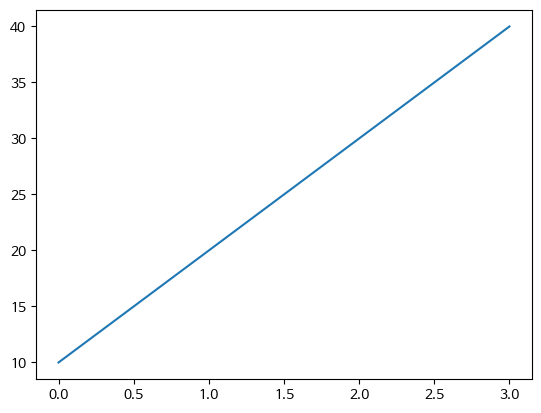

In [38]:
plt.plot([10,20,30,40])
plt.show()

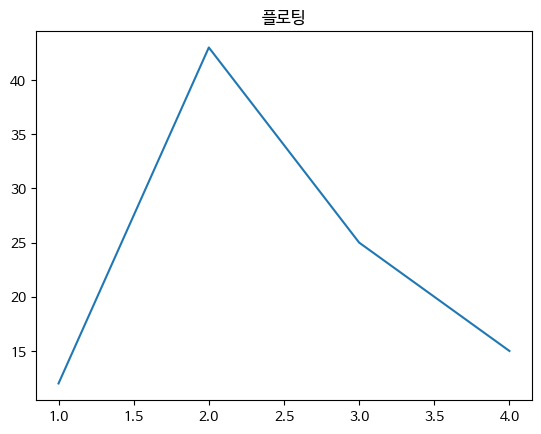

In [39]:
plt.title('플로팅')
plt.plot([1,2,3,4], [12,43,25,15])
plt.show()

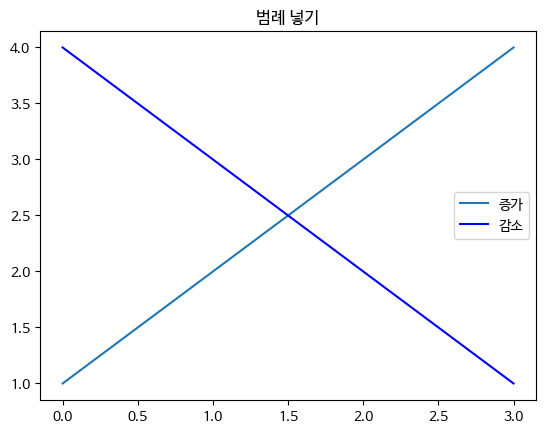

In [40]:
plt.title('범례 넣기')
plt.plot([1,2,3,4], label="증가")
plt.plot([4, 3, 2, 1], 'blue',label="감소")
plt.legend() # 범례 표시 함수
plt.show()

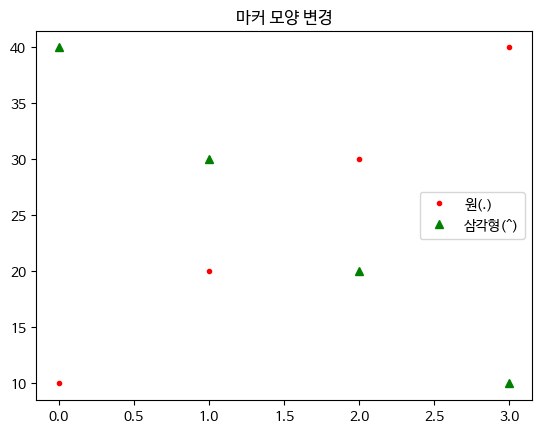

In [41]:
# 그래프 마커 모양 바꾸기
plt.title('마커 모양 변경')
plt.plot([10,20,30,40],'r.', label="원(.)")
plt.plot([40,30,20,10],'g^', label="삼각형(^)")
plt.legend() # 범례 표시 함수
plt.show()

# 2. 내 생일의 기온 변화를 그래프로 그리기

  ### 1. 데이터에 질문하기
  * 생일은 언제인가요?
  * 그날 날씨는 어땠나요?
  * 기록적인 한파가 있었나요? / 시원한 바람이 불었나요?
  * 태어난 날부터 지금까지 매년 생일의 최고 기온을 그래프로 그린다면 어떤 모양일까요?

In [ ]:
# 최고 기온의 데이터 읽어오기
filename = '/content/drive/MyDrive/Colab Notebooks/busan.csv'

import csv
f = open(filename, 'r', encoding='cp949') # 윈도우 한글 인코딩 방식
data = csv.reader(f)
next(data)
for row in data:
  print(row[2])

f.close()

2922


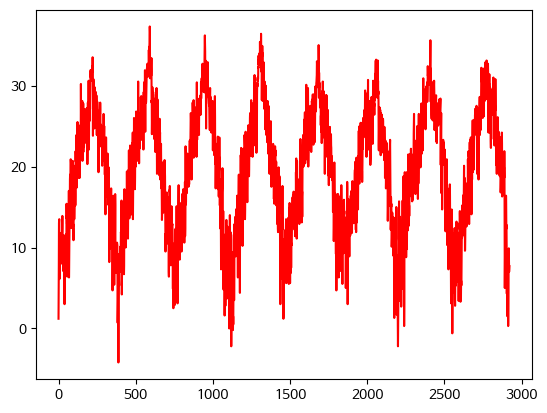

In [22]:
filename = '/content/drive/MyDrive/Colab Notebooks/busan.csv'
import csv
f = open(filename, 'r', encoding="cp949")
data = csv.reader(f)
next(data)
result=[] #최고 기온 데이터를 저장할 리스트 생성
for row in data:
  if row[2] != '': #데이터가 없을때
    result.append(float(row[2]))
print(len(result))
f.close

# 여기 그래프 코드를 추가해주세요
plt.plot(result, 'r')
plt.show()

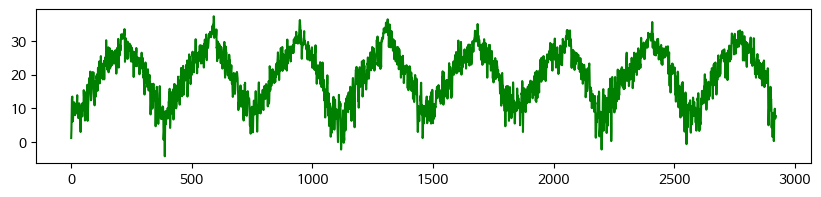

In [23]:
# 그래프 크기 조절하기
plt.figure(figsize=(10,2))
plt.plot(result, "g")
plt.show()

### 3. 날짜 데이터 추출하기 : split()함수
* 파이썬이 제공하는 문자열
* 사용자가 설정하는 특정 문자를 기준으로 문자열을 분리

In [24]:
s="Hello World"
print(s.split()) # 기본적으로 공백을 기준으로 문자열 정리

['Hello', 'World']


In [31]:
date="2020-10-29"
# 연도출력
print(date.split('-')[0])
# 월 출력
print(date.split('-')[1])
# 일 출력
print(date.split('-')[2])

2020
10
29


248


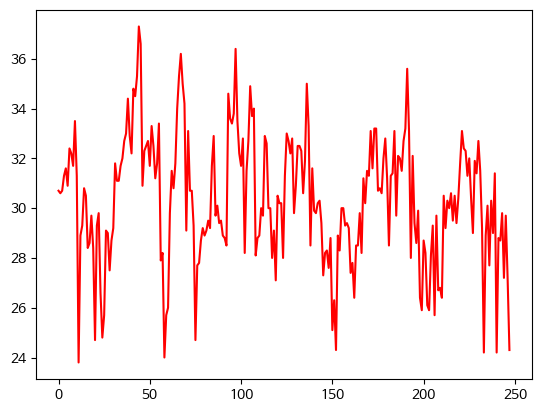

In [48]:
# split()함수를 사용해 1년 중 여름의 정점인 8월의 최고 기온 데이터만 추출해서 그래프로 그리기
filename = '/content/drive/MyDrive/Colab Notebooks/busan.csv'
import csv
f = open(filename, 'r', encoding="cp949")
data = csv.reader(f)
next(data)
result=[] #최고 기온 데이터를 저장할 리스트 생성
for row in data:
  if row[2] != '': #데이터가 없을때
    if row[0].split('-')[1] == '08':
      result.append(float(row[2]))
print(len(result))
f.close

plt.plot(result, 'r')
plt.show()

In [ ]:
# 매년 스승의 날인 5월 15일을 기준으로 최고 기온 데이터에 대한 그래프 그리기